In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [4]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

In [6]:
# If ads are selected completely ramdomly 
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

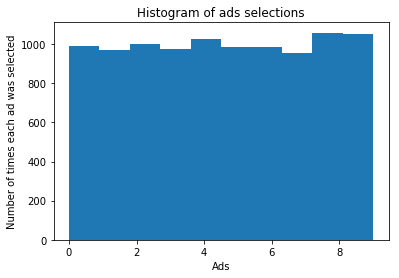

In [7]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

__Step1__. At each round $n$, we consider two numbers for ead ad $i$ :   
* $N_i(n)$ :  The number of times the ad $i$ was selected up to round $n$  
* $R_i(n)$ : The sum of rewards of the ad $i$ up to round $n$  

__Step2__. From these two numbers we compute:
* the average reward of ad $i$ up to round $n$,  
$$\bar{r}_i = \frac{R_i(n)}{N_i(n)}$$  
* the confidence interval [$\bar{r}_i - \Delta_i(n),\bar{r}_i + \Delta_i(n) $] at round$n$ with $$\Delta_i(n) = \sqrt{\frac{3}{2} \frac{log(n)}{N_i(n)}}$$

__Step3__. We select the ad $i$ that has the maximum UCB $\bar{r}_i + \Delta_i(n)$

In [9]:
# Step1
N=10000  # nr of iteration
d= 10  # variation of ads
ads_selected = []
numbers_of_selection= [0] * d
sums_of_rewards= [0]*d
total_reward=0

# Step2,3 
for n in range(0, N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):   # the number of ad
        if (numbers_of_selection[i]>0):    #Number of times the ad is showns. This condition averts the division by zero when n is small. For small n trials, 
            average_rewards= sums_of_rewards[i]/numbers_of_selection[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selection[i])  # n+1 because index n (in range(0,N)) starts from zero and ends in N-1
            upper_bound= average_rewards+delta_i
        else:
            upper_bound = 1e400  # 10**400, This is for first d trials. High UB to make ad i (which is not shown yet) selected
        if upper_bound > max_upper_bound:  # note this is the selection within the same round n
            max_upper_bound=upper_bound
            ad= i   # The best ad. Note i+1 is the real ad number (index starts from zero)
    ads_selected.append(ad)  # Vector of size N containing the info of ads shown
    numbers_of_selection[ad] =numbers_of_selection[ad]+1 # number of times each ads is selected , sum(·)=10k   
    reward= dataset.values[n,ad] # scaler
    sums_of_rewards[ad]= sums_of_rewards[ad] +reward
    total_reward= total_reward+ reward

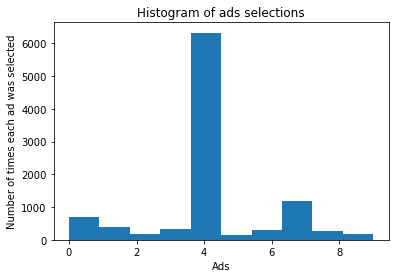

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()